## Chapter 1

Artificial intelligence > machine learning > deep learning

Machine learning discovers rules to execute a data-processing tasks.

Deep learning is a specific subfield of machine learning: a new take on learning representations from data that puts an emphasis on learning successive layers of increasingly meaningful representations.

How many layers contribute to a model of the data is called the depth of the model.

In deep learning, these layered representations are learned via models called neural networks.

You can think of a deep network as a multistage information-distillation operation, where information goes through successive filters and comes out increasingly purified.

<img src = 'deep_learning.png'>

These are the two techniques you should be the most familiar with in order to be successful in applied machine learning today: gradient boosting machines, for shallow- learning problems; and deep learning, for perceptual problems. In technical terms, this means you’ll need to be familiar with XGBoost and Keras—the two libraries that currently dominate Kaggle competitions. 

## Chapter 2

### Sample Model

In [1]:
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import mnist

Using TensorFlow backend.


In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from keras import models
from keras import layers

In [11]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the layer, a data-processiong module that is a filter of data. A deep learning model is a sieve made of a successio of increasingly refined data filters- the layers.

Aside from the network, we need three more things as part of the compilation step:
- loss function
- optimizer
- metrics to monitor during training and testing 

In [12]:
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [15]:
train_images.max()

255

In [16]:
train_images.min()

0

In [17]:
test_images.max()

255

In [18]:
test_images.min()

0

In [27]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [20]:
from keras.utils import to_categorical

In [28]:
# encode the labels from [1, ..., 10] to nd array 
# of binary vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [29]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [30]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.2521 - acc: 0.9269
Epoch 2/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.1042 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 16s 260us/step - loss: 0.0687 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 10s 158us/step - loss: 0.0506 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0377 - acc: 0.9890


In [31]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 51us/step


In [32]:
print('test_acc: ', test_acc)

test_acc:  0.9781


### Data representations for neural networks

A tensor is a container for data - almost always numerical data. Tensors are a generalization of matrices to an arbitrary number of dimensions.

- A tensor that contains only one number is called a scalar. You can display the number of axes of a numpy tensor via the `ndim` attribute. A scalar tensor has 0 axes. The number of axes of a tensor is also called its `rank`.

- an array of numbers is called a vector or 1D tensor.

- an array of vectors is a matrix or 2D tensor.

- If you pack such matrices in a new array, you obtain a 3D tensor.

A tensor is defined by three key attributes:

- number of axes(ranks): np.ndim
- shape: .shape
- data type: .dtype

In [2]:
from keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [5]:
print(train_images.ndim)

3


In [6]:
print(train_images.shape)

(60000, 28, 28)


In [7]:
print(train_images.dtype)

uint8


In [8]:
type(train_images)

numpy.ndarray

In [10]:
digit = train_images[4]

In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

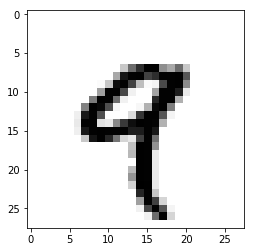

In [20]:
plt.imshow(digit, cmap = plt.cm.binary) # display images on axes
#plt.matshow(digit, cmap = plt.cm.binary) plot a matrix or array as image
plt.show

Selecting specific elements in a tensor is called tensor slicing.

In [23]:
my_slice = train_images[10:100]

In [24]:
print(my_slice.shape)

(90, 28, 28)


In [25]:
my_slice = train_images[10:100, :, :]
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [26]:
# select 14x14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]

In [27]:
my_slice.shape

(60000, 14, 14)

In [28]:
# crop the images to patchs of 14x14 pixels centered in the middle
my_slice = train_images[:, 7:-7, 7:-7]

In general, the first axis in all data tensors in deep learning will be the `sample` axis, in the mnist example, samples are images of digits.

In addition, deep-learning models dont process an entire dataset at once, but rather in small batches.

In [30]:
# batch = train_images[128*n: 128*(n+1)]

When considering such a batch tensor, the first axis is called the `batch axis` or `batch dimension` 

- Vector data: 2D tensors of shape (samples, features)
- Timeseries data or sequence data: 3D tensors of shape (samples, timesteps, features)
- Images: 4D tensors of shape (samples, height, width, channels/color_depth) where channels means color channels
- Video: 5D tensors of shape (samples, frames, height, width, channels/color_depth)

### Tensor Operations

A keras layer instance looks like:
```python
keras.layers.Dense(512, activation='relu')
```
Thie layer can be interpreted as a function which takes as input a 2D tensor and returns another 2D tensor- a new representation for the input tensor.

```python
output = relu(dot(W, input)+b)
```

- dot product (element-wise)
- addition (broadcasting)
- relu: relu(x) == max(x,0) (element-wise)

With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has shape (a, b, ...n, n+1, ..., m) and the other has shape (n, n+1, ..., m). The broadcasting will then uatomatically happen for axes a through n-1

In [33]:
import numpy as np

In [35]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [37]:
z.shape

(64, 3, 32, 10)

Dot product:
<img src = 'dot_product.png'>

(a, b, c, d) . (d, ) -> (a, b, c)

(a, b, c, d) . (d, e) -> (a, b, c, e)

Reshaping a tensor means rearranging its rows and columns to match a target shape

In [39]:
x = np.array([[0., 1.],
                 [2., 3.],
                 [4., 5.]])

In [40]:
x.shape

(3, 2)

In [42]:
x.reshape((6, 1))

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [44]:
x.reshape((2, 3))

array([[0., 1., 2.],
       [3., 4., 5.]])

In [47]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)